# LDA classification using sklearn

In [53]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from confusion_matrix import confusion_matrix

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/fault_all_noise_67.csv")
test_data = pd.read_csv("../TestData/neodata/fault_all_noise_67.csv")
vald_data=pd.read_csv("../ValidationData/neodata/fault_all_noise_67.csv")


In [55]:
trn = train_data.drop('target',axis=1)
tst = test_data.drop('target',axis=1)
val = vald_data.drop('target',axis=1)

targets = train_data['target'].unique().tolist()

labels_trn = train_data['target']
labels_tst = test_data['target']
labels_val = vald_data['target']

trn

,Pdis,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,Tamb,Tset
0,7.953554,-2.565817,31.123060,46.684255,4.690792,1.963097,5.709702,-0.819016,45.811778,8.507916,0
1,7.954020,-2.568147,31.125117,46.276215,4.599423,4.663636,5.712442,1.635481,45.834632,10.503477,0
2,7.953461,-2.565399,31.122651,47.267498,5.299796,2.065427,5.709165,0.500352,45.807229,9.729711,0
3,7.953314,-2.564763,31.122003,47.175463,6.566746,3.171846,5.708320,-0.353219,45.800028,8.383378,0
4,7.953084,-2.563816,31.120986,46.585417,4.236581,1.686780,5.707004,-0.490832,45.788728,9.634032,0
...,...,...,...,...,...,...,...,...,...,...,...
25321,12.564968,2.128050,48.112869,71.502153,22.039596,15.736377,14.422912,12.192623,30.000000,29.727137,12
25322,12.564222,2.131379,48.110532,72.992451,23.635588,16.084412,14.420214,11.200463,30.000000,29.624127,12
25323,12.564077,2.132063,48.110077,71.196424,24.472386,15.723082,14.419673,12.877238,30.000000,29.686571,12
25324,12.564092,2.131989,48.110126,71.302524,24.817385,17.439993,14.419732,10.931673,30.000000,31.075082,12


In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=5)    #Reduction to 5 dimensions
lda.fit(trn,labels_trn)                             #fitting to the training data


LinearDiscriminantAnalysis(n_components=5)

In [57]:
predict = lda.predict(trn)  #making predictions for the training set
predict


array([ 0, 18,  0, ..., 20, 20, 20], dtype=int64)

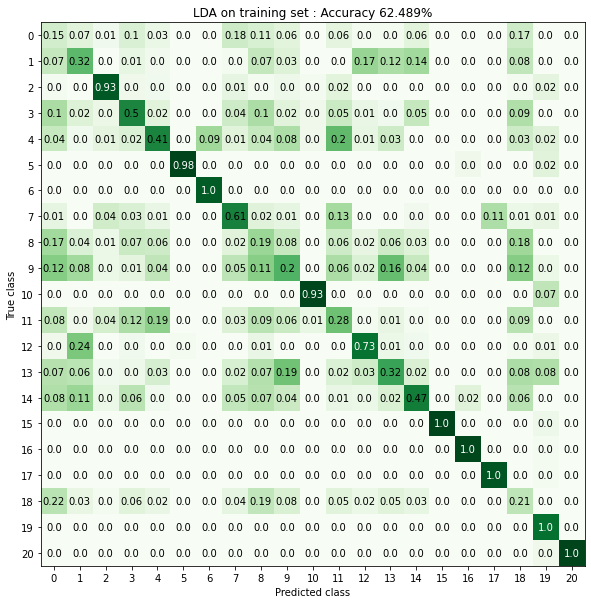

In [58]:
numbers = targets
truth = labels_trn

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(predict,truth):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),eval_labels=False,title='LDA on training set',save_fig_name='PDF/LDA_class_train.pdf')
pass

In [59]:
predict_val = lda.predict(val)
predict_val

array([ 0, 13, 11, ..., 20, 20, 20], dtype=int64)

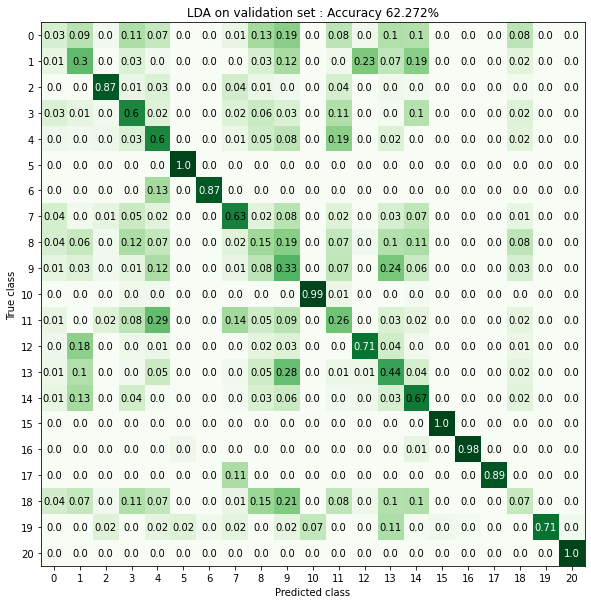

In [60]:
numbers = targets
truth = labels_val

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(truth,predict_val):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),eval_labels=False,title='LDA on validation set',save_fig_name='PDF/LDA_class_val.pdf')
pass

In [61]:
predict_tst = lda.predict(tst)
predict_tst

array([18,  3, 11, ..., 20, 20, 20], dtype=int64)

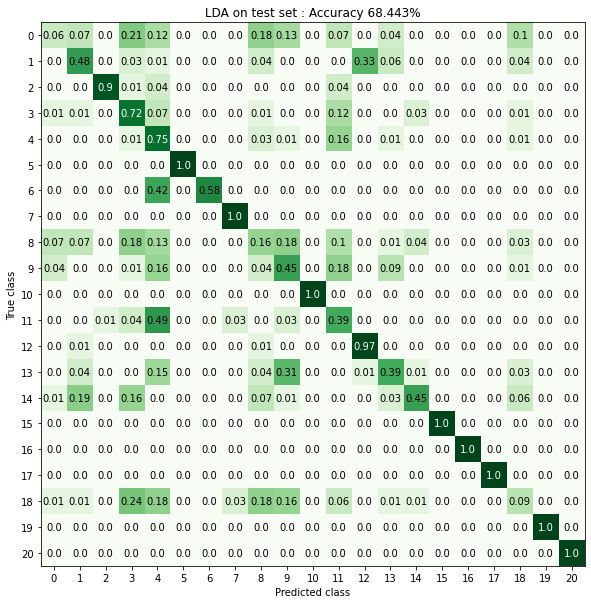

In [62]:
numbers = targets
truth = labels_tst

# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for x,y in zip(truth,predict_tst):
    conf_matrix[int(x)][int(y)] +=1

#plot the confusion matrix
confusion_matrix(conf_matrix, figsize = (10,10),eval_labels=False,title='LDA on test set',save_fig_name='PDF/LDA_class_test.pdf')
pass

Dataset:        fault_all_noise_67.csv

Reduced to:     5 dimensions

Accuracy on training set:   62.489%

Accuracy on validation set: 62.272%

Accuracy on test set:       68.443%

